# Construct accuracy curves

In [1]:
%matplotlib inline

In [57]:
import sys
import copy
import random

sys.path.append("..")

from scripts.load_results import load_results
from strategic_ttc.verifiers.boxed_number import parse_pred_from_explanation
import scripts.accuracy_analysis as aa
import matplotlib.pyplot as plt
import numpy as np
import importlib

from typing import List, Dict, Tuple, Any, Optional
from dataclasses import dataclass

import scripts.game as gm

In [58]:
TOL_12 = [
    "#004183",  # blue
    "#4192E3",  # light blue,
    "#84CDE6",  # cyan,
    "#16A990",  # teal
    
    "#786B06",  # yellow
    "#E1C84C",  # sand
    "#F7949F",  # red
    "#AA3377",  # purple
    "#56002B",  # wine
    
    "#C5C3C3",  # grey
    "#6E6E6E",  # green
    "#000000",  # black
    
]

In [59]:
results = load_results("../final_runs/GSM8K_el")
maj_mean, maj_std, rew_mean, rew_std = {}, {}, {}, {}
token_mean, token_std = {}, {}
model_color = {}
thetas = {}

Processing reason-R1-D-Qwen-1.5B
Total processed: 1319
Processing Qwen2-0.5B
Total processed: 1319
Processing reason-R1-D-Llama-8B
Total processed: 1319
Processing Llama-3.2-3B
Total processed: 1319
Processing Qwen2-1.5B
Total processed: 1319
Processing Llama-3.1-8B
Total processed: 1319
Processing Llama-3-8B
Total processed: 1319
Processing Llama-3.2-1B
Total processed: 1319
Processing reason-R1-D-Qwen-7B
Total processed: 1319
Processing Qwen2.5-3B
Total processed: 1319
Processing Qwen2-7B
Total processed: 1319
Processing Qwen2.5-7B
Total processed: 1319


In [5]:
results_sorted = dict(sorted(results.items(), key=lambda item: item[0]))
results = results_sorted

In [6]:
idx = 0
for model in results.keys():
    model_color[model] = TOL_12[idx]
    idx += 1

In [7]:
reasoning_models = sorted([model for model in results.keys() if "reason" in model])
unreasoning_models = sorted([model for model in results.keys() if model not in reasoning_models])

print(f"Reasoning models: {reasoning_models}")
print(f"Unreasoning models {unreasoning_models}")

Reasoning models: ['reason-R1-D-Llama-8B', 'reason-R1-D-Qwen-1.5B', 'reason-R1-D-Qwen-7B']
Unreasoning models ['Llama-3-8B', 'Llama-3.1-8B', 'Llama-3.2-1B', 'Llama-3.2-3B', 'Qwen2-0.5B', 'Qwen2-1.5B', 'Qwen2-7B', 'Qwen2.5-3B', 'Qwen2.5-7B']


In [8]:
importlib.reload(aa)

all_models_plot_data = {}

for model_name in unreasoning_models:
    print(f"Processing {model_name}...")
    data = results[model_name]
    
    stats_tuple = aa.compute_curves_for_model_fast(
        data,
        parse_pred_fn=parse_pred_from_explanation,
        sample_size=50,
    )
    

    all_models_plot_data[model_name] = stats_tuple

    (
        thetas[model_name],
        maj_mean[model_name],
        maj_std[model_name],
        rew_mean[model_name],
        rew_std[model_name],
        token_mean[model_name],
        token_std[model_name],
    ) = stats_tuple

Processing Llama-3-8B...


100%|██████████| 6/6 [00:02<00:00,  2.08it/s]


Processing Llama-3.1-8B...


100%|██████████| 6/6 [00:02<00:00,  2.22it/s]


Processing Llama-3.2-1B...


100%|██████████| 6/6 [00:02<00:00,  2.22it/s]


Processing Llama-3.2-3B...


100%|██████████| 6/6 [00:02<00:00,  2.23it/s]


Processing Qwen2-0.5B...


100%|██████████| 6/6 [00:02<00:00,  2.24it/s]


Processing Qwen2-1.5B...


100%|██████████| 6/6 [00:02<00:00,  2.22it/s]


Processing Qwen2-7B...


100%|██████████| 6/6 [00:02<00:00,  2.24it/s]


Processing Qwen2.5-3B...


100%|██████████| 6/6 [00:02<00:00,  2.22it/s]


Processing Qwen2.5-7B...


100%|██████████| 6/6 [00:02<00:00,  2.21it/s]


In [9]:
model_color

{'Llama-3-8B': '#004183',
 'Llama-3.1-8B': '#4192E3',
 'Llama-3.2-1B': '#84CDE6',
 'Llama-3.2-3B': '#16A990',
 'Qwen2-0.5B': '#786B06',
 'Qwen2-1.5B': '#E1C84C',
 'Qwen2-7B': '#F7949F',
 'Qwen2.5-3B': '#AA3377',
 'Qwen2.5-7B': '#56002B',
 'reason-R1-D-Llama-8B': '#C5C3C3',
 'reason-R1-D-Qwen-1.5B': '#6E6E6E',
 'reason-R1-D-Qwen-7B': '#000000'}

In [10]:
models_data_llama = {x: all_models_plot_data[x] for x in all_models_plot_data.keys() if "Llama" in x}
models_data_qwen = {x: all_models_plot_data[x] for x in all_models_plot_data.keys() if x not in models_data_llama.keys()}

In [11]:
# aa.plot_all_models_combined(
#     models_data=models_data_llama,
#     colors=model_color,
#     log_scale=True,
#     filename="../figures/GSM8K/all_unreasoning_models_combined_llama.pdf"
# )

In [12]:
# aa.plot_all_models_combined(
#     models_data=models_data_qwen,
#     colors=model_color,
#     log_scale=True,
#     filename="../figures/GSM8K/all_unreasoning_models_combined_qwen.pdf"
# )

In [13]:
importlib.reload(aa)

ylim_accuracy1, ylim_tokens1 = aa.save_separated_plots_overlaid(
    models_data=models_data_llama,
    colors=model_color,
    log_scale=True,
    base_filename="../figures/GSM8K/llama_unreasoning_models_overlaid",
    ylim_accuracy=(np.float64(31.967163988999836), np.float64(96.33760463188236)),
    ylim_tokens=(np.float32(-800.4504), np.float32(20786.883)),
    samples_disp=False
)


ylim_accuracy2, ylim_tokens2 = aa.save_separated_plots_overlaid(
    models_data=models_data_qwen,
    colors=model_color,
    log_scale=True,
    base_filename="../figures/GSM8K/qwen_unreasoning_models_overlaid",
    ylim_accuracy=(np.float64(31.967163988999836), np.float64(96.33760463188236)),
    ylim_tokens=(np.float32(-800.4504), np.float32(20786))
)

[<ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>] ['\\texttt{Llama-3-8B}', '\\texttt{Llama-3.1-8B}', '\\texttt{Llama-3.2-1B}', '\\texttt{Llama-3.2-3B}']


[<ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>] ['\\texttt{Llama-3-8B}', '\\texttt{Llama-3.1-8B}', '\\texttt{Llama-3.2-1B}', '\\texttt{Llama-3.2-3B}']
Saved 4 files to ../figures/GSM8K/llama_unreasoning_models_overlaid_*.pdf
[<ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>] ['\\texttt{Qwen2-0.5B}', '\\texttt{Qwen2.5-7B}', '\\texttt{Qwen2-1.5B}', '\\texttt{Qwen2-7B}', '\\texttt{Qwen2.5-3B}']


[<ErrorbarContainer object of 3 artists>, <ErrorbarContainer 

In [14]:
# for model_name in unreasoning_models:
#     data = results[model_name]
#     (
#         thetas[model_name],
#         maj_mean[model_name],
#         maj_std[model_name],
#         rew_mean[model_name],
#         rew_std[model_name],
#         token_mean[model_name],
#         token_std[model_name],
#     ) = aa.compute_curves_for_model_fast(
#         data,
#         parse_pred_fn=parse_pred_from_explanation,
#         sample_size=50,
#     )
#     aa.plot_model_curves_with_tokens(
#         model_name,
#         thetas[model_name],
#         maj_mean[model_name],
#         maj_std[model_name],
#         rew_mean[model_name],
#         rew_std[model_name],
#         token_mean[model_name],
#         token_std[model_name],
#         log_scale=True,
#         num_questions=len(data["correct"]),
#         colors=model_color,
#         filename=f"../figures/GSM8K/{model_name}_accuracy_tokens_log.pdf"
#     )

In [15]:
# importlib.reload(aa)

# aa.plot_all_curves_delta(
#     thetas, maj_mean, maj_std, rew_mean, rew_std, vertical=True, colors=model_color, filename="../figures/GSM8K/delta_majority_vertical.pdf"
# )

In [16]:
# importlib.reload(aa)

# aa.plot_all_curves(
#     thetas,
#     maj_mean,
#     maj_std,
#     rew_mean,
#     rew_std,
#     vertical=True,
#     colors=model_color,
#     filename="../figures/GSM8K/all_accuracies_vertical.pdf",
# )

In [17]:
# importlib.reload(aa)

# reasoning_accuracy = {}
# reasoning_tokens = {}

# for model_name in reasoning_models:
#     means, stds, tokens, token_stds, all_think = aa.reasoning_accuracy_curve_relative_effort(
#         results[model_name], qs=(0.0, 0.2, 0.4, 0.6, 0.8, 1.0)
#     )

#     plt.hist(all_think, bins=300)
#     plt.title(f"Distribution of reasoning tokens {model_name}")
#     plt.show()


#     aa.plot_reasoning_curves_accuracy_and_tokens_new(
#         means, stds,
#         tokens, token_stds,
#         title="Accuracy and Tokens vs. Reasoning Level for " + model_name.split("--")[0],
#         num_questions=len(results[model_name]["correct"]),
#         filename=f"../figures/GSM8K/{model_name}_reasoning_accuracy_tokens.pdf"
#     )

#     reasoning_accuracy[model_name] = means
#     reasoning_tokens[model_name] = tokens


In [18]:
importlib.reload(aa)


reasoning_plot_data = {}


reasoning_colors = {
    "reason-R1-D-Qwen-1.5B": TOL_12[-3],
    "reason-R1-D-Qwen-7B": TOL_12[-2],
    "reason-R1-D-Llama-8B": TOL_12[-1],
}

for model_name in reasoning_models:
    means, stds, tokens, token_stds, all_think = aa.reasoning_accuracy_curve_relative_effort(
        results[model_name], qs=(0.0, 0.2, 0.4, 0.6, 0.8, 1.0)
    )

    reasoning_plot_data[model_name] = (means, stds, tokens, token_stds)

In [19]:
importlib.reload(aa)

aa.save_reasoning_plots_separated_f(
    models_data=reasoning_plot_data,
    colors=reasoning_colors, 
    base_filename="../figures/GSM8K/reasoning_models"
)

reason-R1-D-Llama-8B
reason-R1-D-Qwen-1.5B
reason-R1-D-Qwen-7B
Saved separate files: ../figures/GSM8K/reasoning_models_accuracy.pdf, ../figures/GSM8K/reasoning_models_tokens.pdf, ../figures/GSM8K/reasoning_models_legend.pdf


# Analysis

In [20]:
unreasoning_accuracy_majority = {}
unreasoning_tokens_majority = {}
unreasoning_accuracy_reward = {}
unreasoning_tokens_reward = {}

reasoning_accuracy = {}
reasoning_tokens = {}

for model_name, data in results.items():
    if model_name in reasoning_models:
        continue
    unreasoning_accuracy_majority[model_name] = maj_mean[model_name]
    unreasoning_tokens_majority[model_name] = token_mean[model_name]
    unreasoning_accuracy_reward[model_name] = rew_mean[model_name]
    unreasoning_tokens_reward[model_name] = token_mean[model_name]

for model_name in reasoning_models:
    reasoning_accuracy[model_name] = np.asarray(reasoning_plot_data[model_name][0], dtype=np.float32)
    reasoning_tokens[model_name] = np.asarray(reasoning_plot_data[model_name][2], dtype=np.float32)

In [21]:
# for model_name in list(unreasoning_accuracy_majority.keys()):
#     new_name = model_name.split("--")[0]
#     unreasoning_accuracy_majority[new_name] = unreasoning_accuracy_majority.pop(model_name)
#     unreasoning_tokens_majority[new_name] = unreasoning_tokens_majority.pop(model_name)
#     unreasoning_accuracy_reward[new_name] = unreasoning_accuracy_reward.pop(model_name)
#     unreasoning_tokens_reward[new_name] = unreasoning_tokens_reward.pop(model_name)

In [37]:
providers = []

for model_name in unreasoning_accuracy_majority.keys():
    key = model_name
    provider = gm.Provider(
        name=model_name,
        base_model_key=key,
        accuracy_curve=unreasoning_accuracy_majority[key],
        token_curve=unreasoning_tokens_majority[key],
        margin=0.25
    )
    providers.append(provider)

thetas = np.array([1, 4, 8, 16, 32, 64])

In [23]:
# providers = []

# for model_name in unreasoning_accuracy_reward.keys():
#     key = model_name
#     provider = gm.Provider(
#         name=model_name,
#         base_model_key=key,
#         accuracy_curve=unreasoning_accuracy_reward[key],
#         token_curve=unreasoning_tokens_reward[key],
#         margin=0.25
#     )
#     providers.append(provider)

In [24]:
# importlib.reload(gm)

# providers = []

# for model_name in reasoning_accuracy.keys():
#     key = model_name
#     provider = gm.Provider(
#         name=model_name,
#         base_model_key=key,
#         accuracy_curve=reasoning_accuracy[key],
#         token_curve=reasoning_tokens[key],
#         margin=0.25
#     )
#     providers.append(provider)

# thetas = np.array([1, 2, 3, 4, 5])

In [25]:
# alpha_grid = [0.008, 0.016, 0.032, 0.064]

# fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=False)
# axes = axes.ravel()

# for ax, a in zip(axes, alpha_grid):
#     cfg = gm.MarketConfig(alpha=a, beta=5, default_margin=0.25, value_curve="power", gamma=3)
#     Vc = gm.compute_V_curves(thetas, providers, cfg)
#     for name, v in Vc.items():
#         ax.plot(thetas, v, marker="o", linewidth=1.4, label=name)
#     ax.axhline(0, linewidth=1)
#     ax.set_xscale("log", base=2)
#     ax.set_xticks(thetas)
#     ax.set_xticklabels([str(t) for t in thetas])
#     ax.set_title(f"alpha={a}")
#     ax.set_xlabel("theta")
#     ax.set_ylabel("V")

# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc="lower center", ncol=3, fontsize=9, frameon=True)

# fig.suptitle("Provider value V across theta for different alpha values", y=0.98, fontsize=14)
# fig.tight_layout(rect=[0, 0.06, 1, 0.95])
# plt.show()

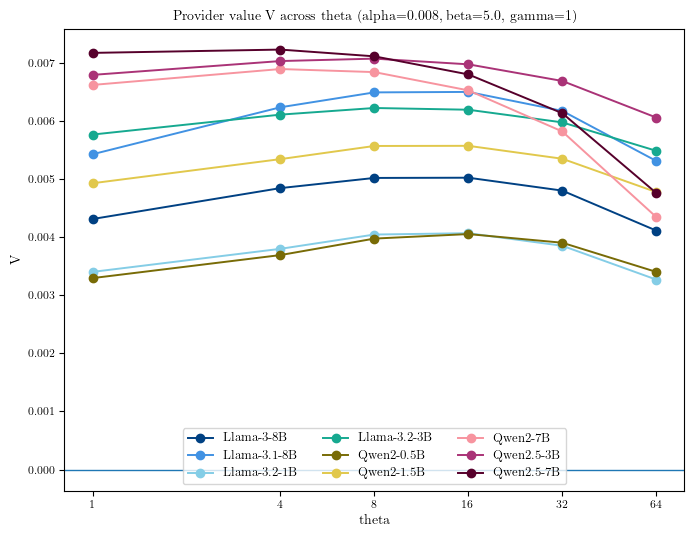

In [ ]:
importlib.reload(gm)

config = gm.MarketConfig(
    alpha=0.008,       
    beta=5.0,
    gamma=1,
    default_margin=0.25,
    value_curve="power",
)

V_curves = gm.compute_V_curves(thetas, providers, config)

fig, ax = plt.subplots(figsize=(8, 6))

for name, v in V_curves.items():
    ax.plot(thetas, v, marker="o", linewidth=1.4, label=name, color=model_color[name])
ax.axhline(0, linewidth=1)
ax.set_xscale("log", base=2)
ax.set_xticks(thetas)
ax.set_xticklabels([str(t) for t in thetas])
ax.set_title(f"Provider value V across theta (alpha={config.alpha}, beta={config.beta}, gamma={config.gamma})")
ax.set_xlabel("theta")
ax.set_ylabel("V")
ax.legend(loc="lower center", ncol=3, fontsize=9, frameon=True)
plt.show()

In [56]:
importlib.reload(gm)
importlib.reload(aa)

margins = [0.25]

for m in margins:
    print(f"Margin: {m}")
    betas_to_test = [1, 1000, 1000000]
    print("Running simulations...")

    results = {}

    for b in betas_to_test:
        sim_config = copy.copy(config) 
        sim_config.beta = b
        sim_config.default_margin = m

        print(f"  Beta: {b}")
        
        hist, poa, pot, shares = gm.run_simulation_sequential_robust(
            providers, 
            sim_config, 
            max_iter=1000, 
            v0=0.0,     
            tolerance=0.00000001
        )
        results[b] = (hist, poa, pot, shares)

    base_name = f"../figures/GSM8K/unreasoning_models_conv_m{m}"
    
    aa.bet_pot_analysis(providers, thetas, betas_to_test, results, base_filename=base_name, colors=model_color, reasoning=False)
    gm.plot_market_shares(providers, betas_to_test, results, base_filename=base_name, colors=model_color)
    gm.plot_combined_dynamics(providers, thetas, betas_to_test, results, base_filename="../figures/GSM8K/unreasoning_models_combined", colors=model_color, reasoning=False)

Margin: 0.25
Running simulations...
  Beta: 1
Fast Global Optimization Complete. Max Welfare: 0.0053
  Beta: 1000
Fast Global Optimization Complete. Max Welfare: 0.0068
  Beta: 1000000
Fast Global Optimization Complete. Max Welfare: 0.0073
Saved: ../figures/GSM8K/unreasoning_models_conv_m0.25_beta1_strategies_combined.pdf
Saved: ../figures/GSM8K/unreasoning_models_conv_m0.25_beta1_potential.pdf
Saved: ../figures/GSM8K/unreasoning_models_conv_m0.25_beta1000_strategies_combined.pdf
Saved: ../figures/GSM8K/unreasoning_models_conv_m0.25_beta1000_potential.pdf
Saved: ../figures/GSM8K/unreasoning_models_conv_m0.25_beta1000000_strategies_combined.pdf
Saved: ../figures/GSM8K/unreasoning_models_conv_m0.25_beta1000000_potential.pdf
Saved: ../figures/GSM8K/unreasoning_models_conv_m0.25_legend.pdf
Saved: ../figures/GSM8K/unreasoning_models_conv_m0.25_beta1_shares.pdf
Saved: ../figures/GSM8K/unreasoning_models_conv_m0.25_beta1000_shares.pdf
Saved: ../figures/GSM8K/unreasoning_models_conv_m0.25_beta

In [32]:
beta_values = np.logspace(0, 6, num=1000)

In [33]:
importlib.reload(gm)
final_poas, final_potentials = gm.sweep_beta_vs_poa(providers, config, beta_values)

Fast Global Optimization Complete. Max Welfare: 0.0037
Fast Global Optimization Complete. Max Welfare: 0.0037
Fast Global Optimization Complete. Max Welfare: 0.0037
Fast Global Optimization Complete. Max Welfare: 0.0037
Fast Global Optimization Complete. Max Welfare: 0.0037
Fast Global Optimization Complete. Max Welfare: 0.0037
Fast Global Optimization Complete. Max Welfare: 0.0037
Fast Global Optimization Complete. Max Welfare: 0.0037
Fast Global Optimization Complete. Max Welfare: 0.0037
Fast Global Optimization Complete. Max Welfare: 0.0037
Fast Global Optimization Complete. Max Welfare: 0.0037
Fast Global Optimization Complete. Max Welfare: 0.0037
Fast Global Optimization Complete. Max Welfare: 0.0037
Fast Global Optimization Complete. Max Welfare: 0.0037
Fast Global Optimization Complete. Max Welfare: 0.0037
Fast Global Optimization Complete. Max Welfare: 0.0037
Fast Global Optimization Complete. Max Welfare: 0.0037
Fast Global Optimization Complete. Max Welfare: 0.0037
Fast Globa

In [34]:
importlib.reload(gm)
gm.plot_beta_sweep(beta_values, final_poas, base_filename="../figures/GSM8K/reasoning_market_beta_sweep_reasoning_models")

Saved plot to ../figures/GSM8K/reasoning_market_beta_sweep_reasoning_models_inefficiency.pdf


In [ ]:
beta_values[np.argmax(final_poas)]

np.float64(422.9242874389499)

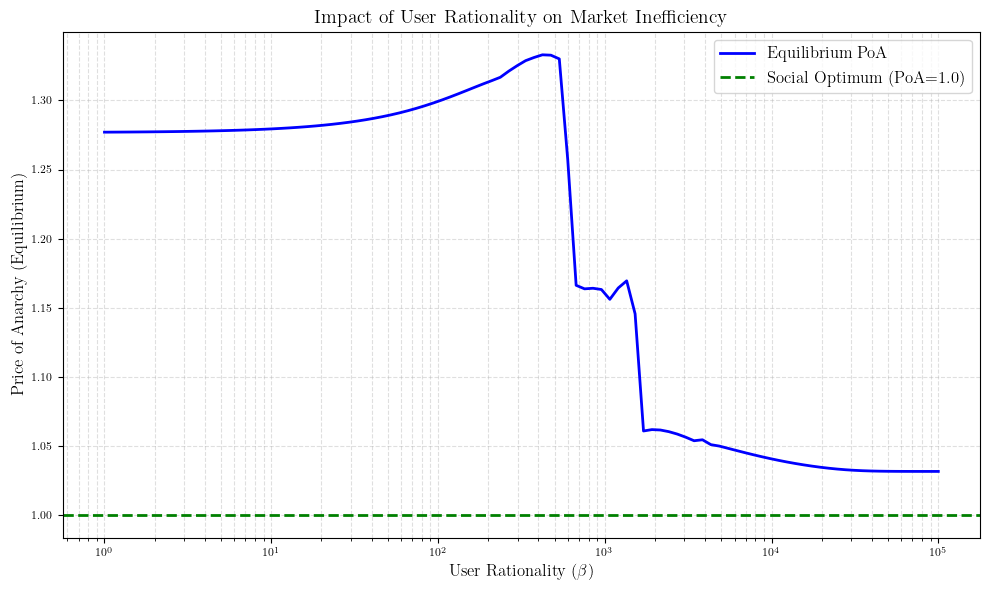

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(beta_values, final_poas, linestyle='-', linewidth=2, color='b', label='Equilibrium PoA')
plt.axhline(1.0, color='green', linestyle='--', linewidth=2, label='Social Optimum (PoA=1.0)')

plt.xscale('log') 
plt.xlabel(r'User Rationality ($\beta$)', fontsize=12)
plt.ylabel('Price of Anarchy (Equilibrium)', fontsize=12)
plt.title('Impact of User Rationality on Market Inefficiency', fontsize=14)
plt.grid(True, which="both", ls="--", alpha=0.4)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
beta_values = np.logspace(-2, 0, num=100)
final_poas, final_potentials = gm.sweep_beta_vs_poa(providers, config, beta_values)

plt.figure(figsize=(10, 6))
plt.plot(beta_values, final_potentials, linestyle='-', linewidth=2, color='orange', label='Equilibrium Potential')

plt.xscale('log') 
plt.xlabel(r'User Rationality ($\beta$)', fontsize=12)
plt.ylabel('Price of Anarchy (Equilibrium)', fontsize=12)
plt.title('Impact of User Rationality on Market Inefficiency', fontsize=14)
plt.grid(True, which="both", ls="--", alpha=0.4)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

Fast Global Optimization Complete. Max Welfare: 0.0035
Fast Global Optimization Complete. Max Welfare: 0.0035
Fast Global Optimization Complete. Max Welfare: 0.0035
Fast Global Optimization Complete. Max Welfare: 0.0035
Fast Global Optimization Complete. Max Welfare: 0.0035
Fast Global Optimization Complete. Max Welfare: 0.0035
Fast Global Optimization Complete. Max Welfare: 0.0035
Fast Global Optimization Complete. Max Welfare: 0.0035


KeyboardInterrupt: 